The World Happiness Report is a landmark survey of the state of global happiness. The World Happiness ranks 157 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness. The scores are based on answers to the main life evaluation question asked in the poll.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
data = pd.read_csv('dataset\happiness.csv')
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


Score- Happiness score as the sum of all numerical columns in the datasets. <br/>
Trust- A quantification of the people’s perceived trust in their governments. <br/>
Generosity- Numerical value estimated based on the perception of Generosity experienced by poll takers in their country.<br/>
Social Support- Metric estimating satisfaction of people with their friends and family.<br/>
Freedom- Perception of freedom quantified.<br/>
Dystopia- Hypothetically the saddest country in the world.<br/>

In [3]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856822,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [4]:
data["Region"].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

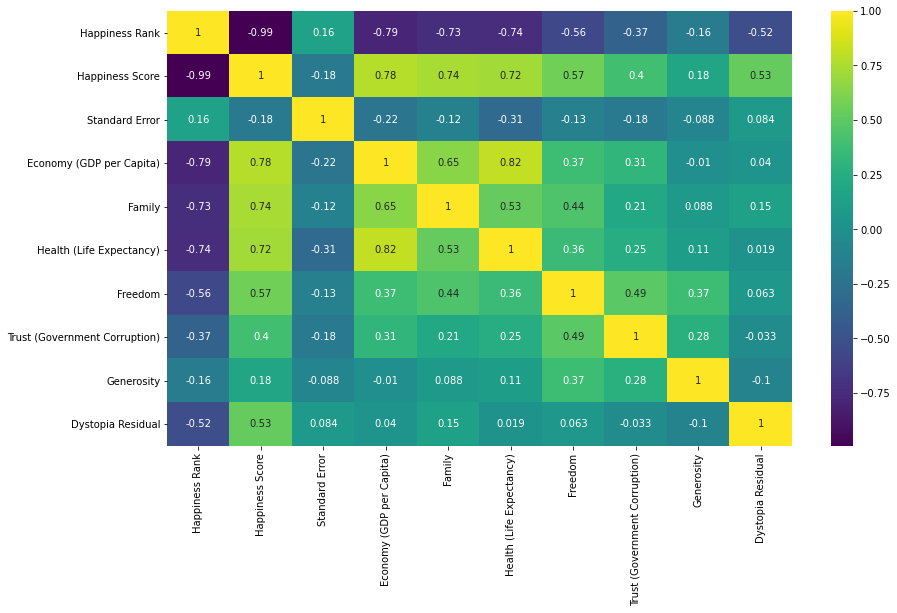

In [5]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(data.corr(), annot=True, cmap="viridis");

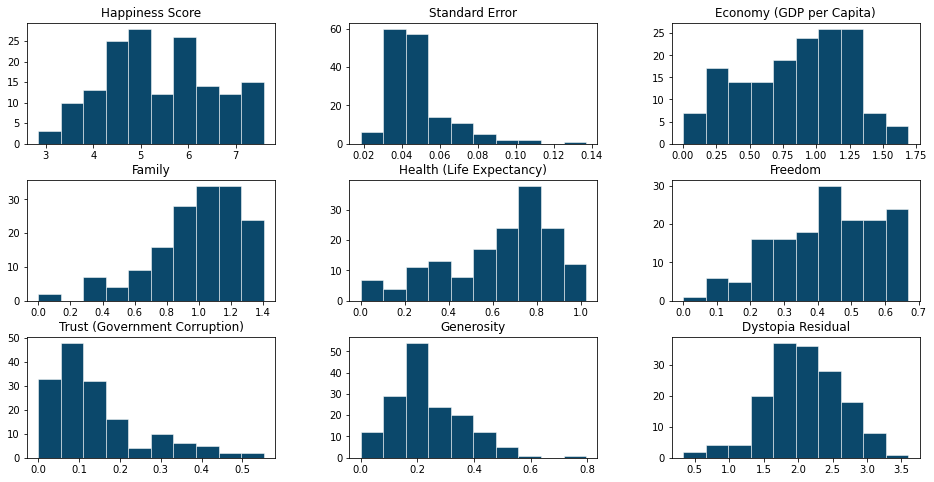

In [6]:
data.drop('Happiness Rank',axis=1).hist(edgecolor = 'white', linewidth = 0.5, figsize = (16,8),grid=False,color='#0B486B')
plt.show()

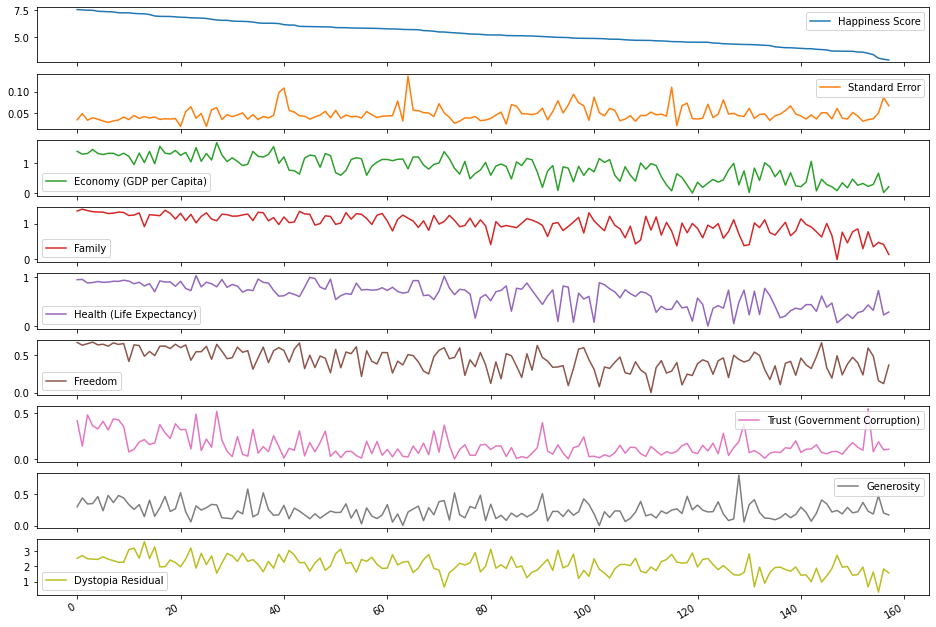

In [7]:
data.drop('Happiness Rank',axis=1).plot(subplots=True, figsize=(16, 12));

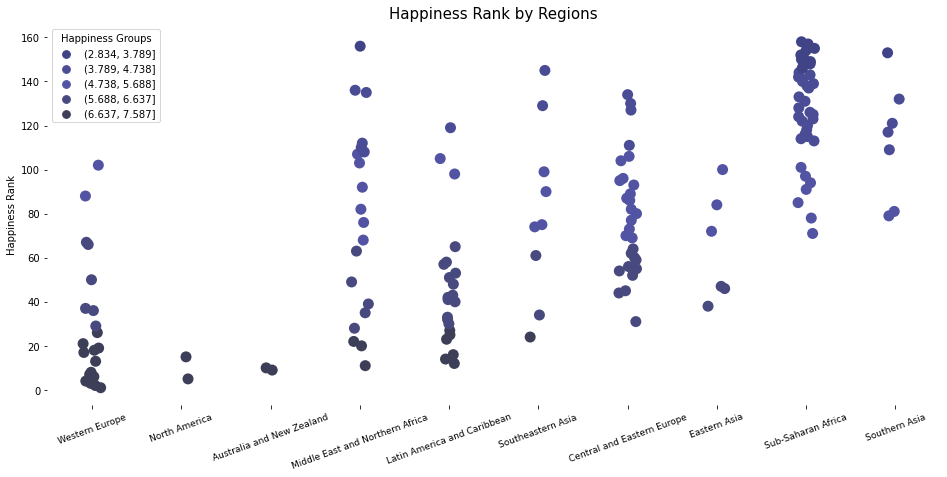

In [8]:
data['Happiness Groups']=pd.cut(data['Happiness Score'],5)
f,ax = plt.subplots(1,1,figsize=(16,7))
sp0 = sns.stripplot(x="Region", y="Happiness Rank", data=data, jitter=True,palette='tab20b_d',size=11,hue='Happiness Groups')
plt.xticks(rotation=20,fontsize=9);
plt.xlabel('');
sp0.set_title('Happiness Rank by Regions',fontsize=15);
sns.despine(left=True,bottom=True);

In [9]:
x = data.drop('Happiness Rank', axis=1)
y = data["Happiness Rank"]

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [13]:
scale = StandardScaler()
sdata = scale.fit_transform(x.drop(['Country', 'Happiness Groups', 'Region'], axis=1))

In [14]:
xtrain, xtest, ytrain, ytest = train_test_split(sdata, y, test_size=0.3, random_state=42)

In [15]:
reg = LinearRegression()
reg.get_params(deep = True)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [16]:
model = reg.fit(xtrain, ytrain)
pred = reg.predict(xtest)
reg.score(xtest,ytest)

0.984194338645108

### <div style="text-align: right"> Developed by Mr. Ronik Dedhia</div>